* DSC530: Week 4
* 4.2 Exercise
* Marty Hoehler
* 4-7-24

# Exercise 3-1

First, we'll use code from previous weeks to import the data.  

In [6]:
import numpy as np

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [7]:
import nsfg
resp = nsfg.ReadFemResp()

Next, we'll do some exploration of the "numkdhh" value to understand it a bit better.

In [8]:
resp.numkdhh.value_counts().sort_index()

0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

From these numbers, we can see where bias would set in if we interviewed a random number of children.  The 3563 families that have 0 children would never be sampled.  We'll use the thinkplot functions from the text to create the pmf of these values.


In [15]:
import thinkstats2
actual_pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')
print('actual mean', actual_pmf.Mean())

actual mean 1.024205155043831


Next, we'll use the method in the text to create a biased histogram that simulates what we would see if we surveyed children and asked them the number of children in their family.  This "BiasPMF()" function, taken from the text, will create the biased pmf.

In [16]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Now that we have the function, we'll use it to create the biased pmf and find the mean.

In [18]:
biased_pmf = BiasPmf(actual_pmf, label = 'observed')
print('biased mean', biased_pmf.Mean())

biased mean 2.403679100664282


We can see that the biased mean is much higher than the actual mean.

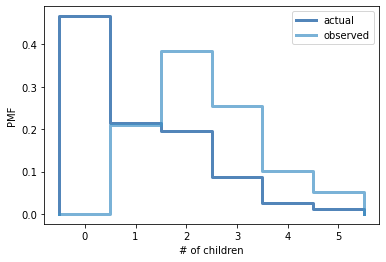

<Figure size 576x432 with 0 Axes>

In [23]:
import thinkplot

thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Show(xlabel='# of children',ylabel='PMF')

As expected, the 'observed' line has no responses from families with 0 children.

# Exercise 3-2

Creating functions for mean and variance - 
 - I used this site for help with the loop in the code:
-  https://stackoverflow.com/questions/49998584/how-to-use-a-for-loop-to-calculate-mean-of-list-of-numbers-python

In [48]:
def PmfMean(pmf):
    total = 0
    for x, p in pmf.Items():
        total = total + (p * x)                    
    return total

In [49]:
PmfMean(actual_pmf)

1.024205155043831

In [50]:
PmfMean(biased_pmf)

2.403679100664282

These agree with the means calculated in Exercise 3-1.  Next, we'll create a similar funciton for variance.

In [53]:
def PmfVar(pmf):
    total = 0
    for x, p in pmf.Items():
        total = total + (p * ((x - PmfMean(pmf))**2))
    return total

In [54]:
PmfVar(actual_pmf)

1.4128643263531195

In [55]:
print('actual variance', actual_pmf.Var())

actual variance 1.4128643263531195


In [56]:
PmfVar(biased_pmf)

1.1732721055059874

In [57]:
print('biased variance', biased_pmf.Var())

biased variance 1.1732721055059874


This shows that the `PmfVar()` function we created function gives the same result as pmf.Var().

# Exercise 3-1